## Outliers & Fehler
Analyse von möglichen Fehler und Ausreisser im Dataset

In [1]:
import src.package.importer as im
import src.package.ml_helper as ml
import src.package.charts as charts
import src.package.consts as c
import seaborn as sns

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_dataset('../package/dataset.csv')
df = im.select_relevant_features(df, additional_features=[c.FIELD_ID])


#### Hohes HNF/GF Verhältnis

In [2]:
df[df[c.FIELD_HNF_GF_RATIO] > 0.95]

,id,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
1036,6273,FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__GA...,HALLEN,GLASSFASSADE_GLASSFASSADE,3880.0,NaN,3800.0,17250.0,NaN,1,1.0,0.0,5775000.0,3880.0,NaN,0.979381
1048,2282,LAGERBAUTEN__INDUSTRIEBAUTEN_GEWERBEBAUTEN__LA...,HALLEN,HOLZBAU_OHNE_MASSIVHOLZ,496.0,479.0,473.0,5175.0,NaN,1,1.0,0.0,1396000.0,496.0,7740.0,0.953629
1166,3136,GESUNDHEITSBAUTEN__UNIVERSITAETSKLINIKEN_UNTER...,GESUNDHEIT,UNKNOWN,6456.0,NaN,7919.0,85637.0,NaN,1,2.0,3.0,153700000.0,6456.0,NaN,1.226611


#### HNF/GF Ratio Ausreisser

In [3]:
ratio_outliers = ml.get_outliers(df, c.FIELD_HNF_GF_RATIO, factor=2)

mean 0.563922435424204 - std 0.13022728877172607
0.3034678578807518 < x < 0.8243770129676561


d:\development\fhnw\ip5-metriken-bauwesen\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratio_hnf_gf'>

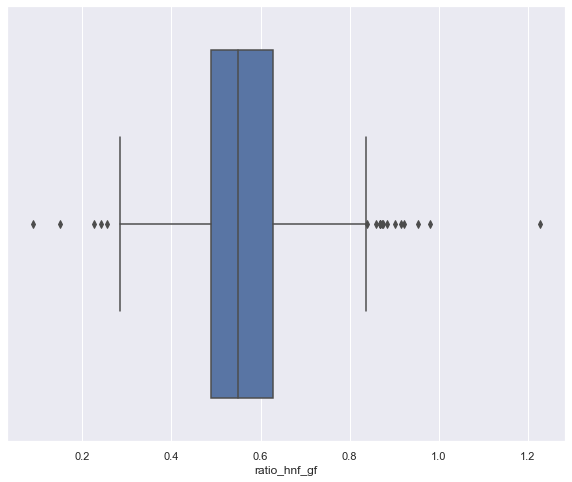

In [4]:
sns.boxplot(df[c.FIELD_HNF_GF_RATIO])

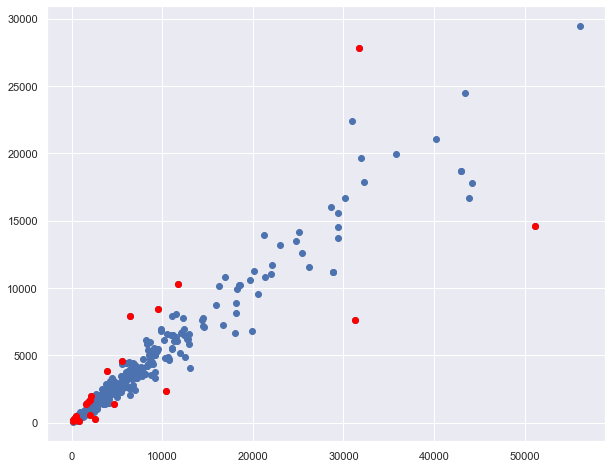

In [5]:
charts.scatter_highlight(df, ratio_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)

#### HNF Ausreisser

In [6]:
hnf_outliers = ml.get_outliers(df, c.FIELD_AREA_MAIN_USAGE, factor=3)

mean 3414.008948545861 - std 4470.124216521338
-9996.363701018154 < x < 16824.381598109874


d:\development\fhnw\ip5-metriken-bauwesen\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_main_usage'>

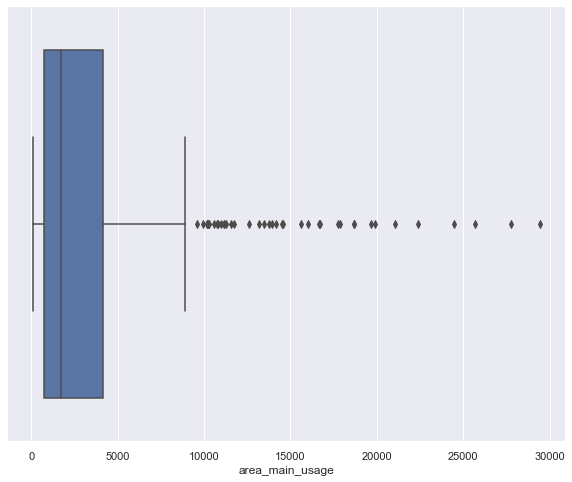

In [7]:
sns.boxplot(df[c.FIELD_AREA_MAIN_USAGE])

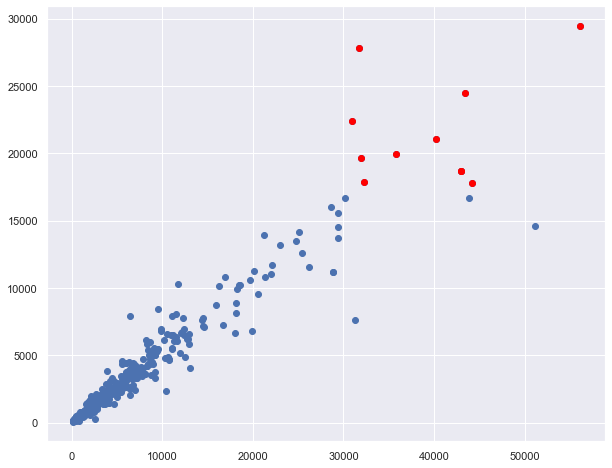

In [8]:
charts.scatter_highlight(df, hnf_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)

#### GF Ausreisser

In [9]:
gf_outliers = ml.get_outliers(df, c.FIELD_AREA_TOTAL_FLOOR_416, factor=3)

mean 6490.333687566419 - std 8702.532297715963
-19617.26320558147 < x < 32597.93058071431


d:\development\fhnw\ip5-metriken-bauwesen\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_total_floor_416'>

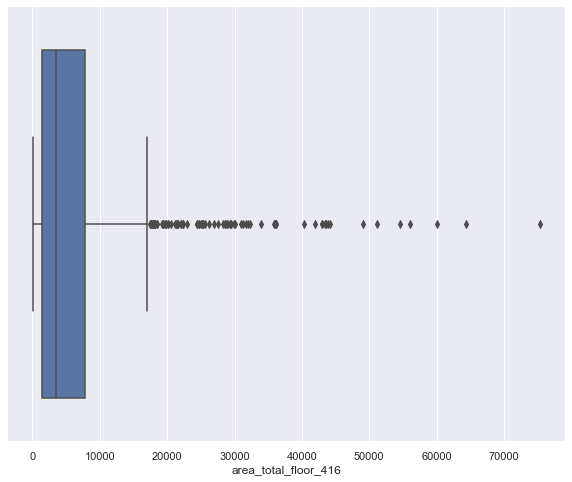

In [10]:
sns.boxplot(df[c.FIELD_AREA_TOTAL_FLOOR_416])

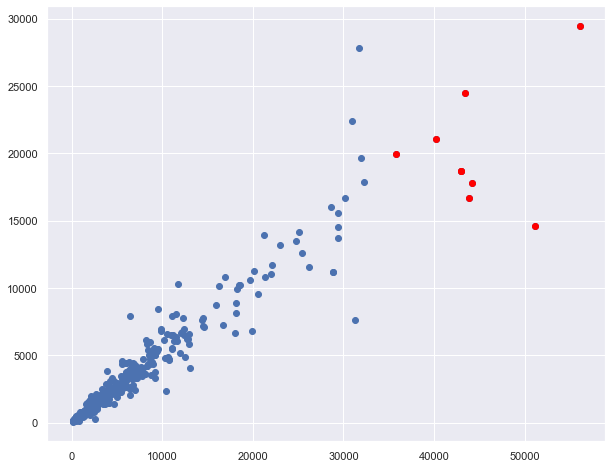

In [11]:
charts.scatter_highlight(df, gf_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)